In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [3]:
avc_df = pd.read_csv('stroke.csv')

In [4]:
avc_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


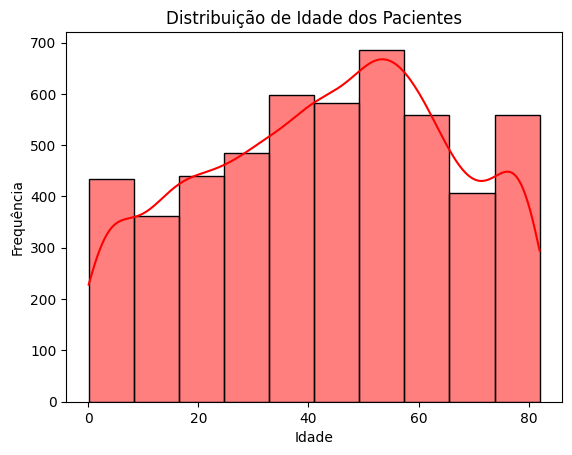

In [6]:
#Plota o histograma da idade dos pacientes
sns.histplot(avc_df['age'], bins=10, kde=True, color='red')

#Insere um título para o gráfico
plt.title('Distribuição de Idade dos Pacientes')

#Adicionam rótulo ao eixo X
plt.xlabel('Idade')

#Adicionam rótulo ao eixo Y
plt.ylabel('Frequência')

#Exibe o gráfico
plt.show()

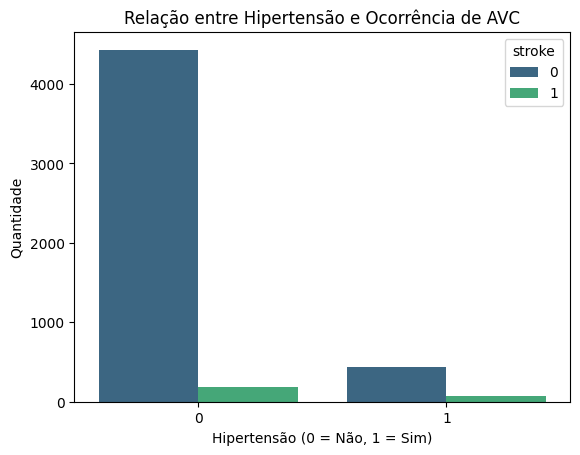

In [7]:
sns.countplot(x='hypertension', hue='stroke', data=avc_df,palette='viridis')

plt.title('Relação entre Hipertensão e Ocorrência de AVC')

plt.xlabel('Hipertensão (0 = Não, 1 = Sim)')

plt.ylabel('Quantidade')

plt.show()

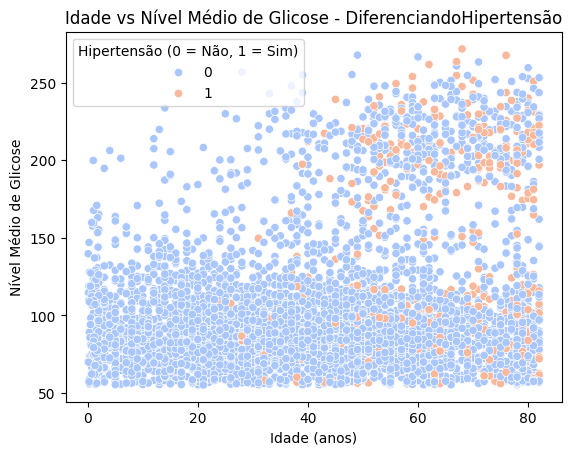

In [8]:
sns.scatterplot(x='age', y='avg_glucose_level', data=avc_df, hue='hypertension', palette='coolwarm')

plt.title('Idade vs Nível Médio de Glicose - DiferenciandoHipertensão')

plt.xlabel('Idade (anos)')

plt.ylabel('Nível Médio de Glicose')

plt.legend(title='Hipertensão (0 = Não, 1 = Sim)')

plt.show()

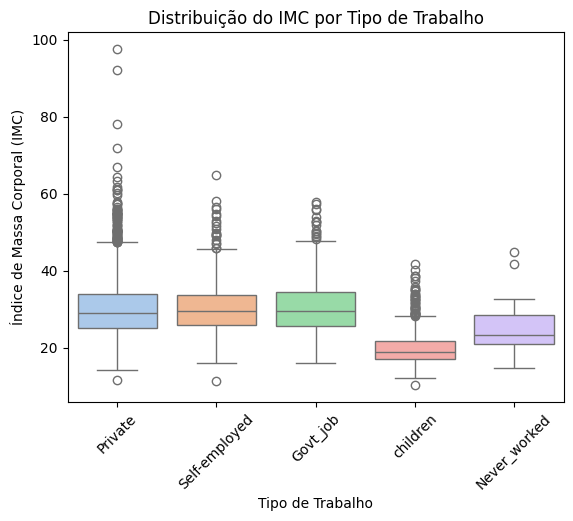

In [9]:
sns.boxplot(x='work_type', y='bmi', data=avc_df, hue='work_type', palette='pastel')

plt.title('Distribuição do IMC por Tipo de Trabalho')

plt.xlabel('Tipo de Trabalho')

plt.ylabel('Índice de Massa Corporal (IMC)')

plt.xticks(rotation=45)

plt.show()

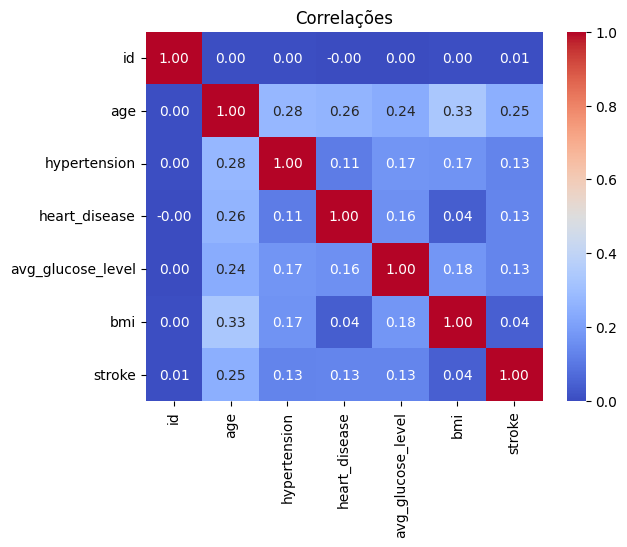

In [10]:
corr = avc_df.corr(numeric_only=True)

sns.heatmap(data=corr,annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlações')

plt.show()

In [11]:
fig = px.pie(avc_df,
             names='work_type',
             values='stroke',
             title='Proporção de AVCs por Tipo de Trabalho')

fig.update_traces(textinfo='percent+label')

fig.show()

In [12]:
fig = px.violin(avc_df,
                x='ever_married',  y='avg_glucose_level', color='ever_married', box=True,
                points='all',
                title='Distribuição do Nível Médio de Glicosepor Estado Civil')

fig.update_layout(
    xaxis_title='Estado Civil',
    yaxis_title='Nível Médio de Glicose')

fig.show()

In [13]:
fig = px.sunburst(
    avc_df,
    path=['gender', 'work_type', 'hypertension'],
    color='stroke',
    title='Distribuição Hierárquica por Gênero, Tipo de Trabalhoe Hipertensão'
    )

# Mostrar os rótulos nas seções
fig.update_traces(textinfo='label+percent entry')

fig.show()

In [14]:
# Criação da coluna faixa_idade com pd.cut()
avc_df['age_range'] = pd.cut(avc_df['age'], bins=[0, 30, 50, 70,100],
                             labels=['Até 30 anos', '31-50 anos','51-70 anos', '71+ anos'])

# Agrupamento e cálculo da proporção de AVC por faixa etária
hipertencao_df = avc_df.groupby('age_range').agg(
    hypertension_proportion = ('hypertension', 'mean')
    ).reset_index()

# Convertendo a proporção para um formato percentual
hipertencao_df['hypertension_percent'] = hipertencao_df['hypertension_proportion']*100

/tmp/ipython-input-151706166.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [15]:
fig = px.bar(hipertencao_df,
             x='age_range', y='hypertension_percent', color='age_range',
             title='Proporção de Hipertensão por Faixa Etária')

fig.update_layout(
                  xaxis_title='Faixa Etária',
                  yaxis_title='Proporção de Hipertensão',
                  legend_title_text='Faixa Etária'
                  )

fig.show()

In [16]:
#Filtro de idade
avc_df = avc_df[avc_df['age'] >= 18]

# Cálculo da glicose média por idade
media_glicose_df = avc_df.groupby('age').agg(
    media_glicose = ('avg_glucose_level', 'mean')
    ).reset_index()

fig = px.line(media_glicose_df,
              x='age',
              y='media_glicose',
              markers=True,title='Glicose Média por Idade')

fig.update_layout(xaxis_title='Idade',yaxis_title='Glicose Média',)

fig.show()